### **Project 2: Ames Housing Data and Kaggle Challenge**

# Regularization Applied to Selective Polynomial Features

## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from modules.model_executor import run_model, submit_a_kaggle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)

## Read in Cleaned Data

In [6]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

In [7]:
# drop the Unnamed: 0 and pid columns
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

In [8]:
train.head()

,id,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_NA,alley_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_NA,bsmt_exposure_No,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,misc_feature_Gar2,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,109,60,69.0552,13517,4,6,8,1976,2005,289.0,4,3,3.0,3.0,7,533.0,1,0.0,192.0,725.0,5,1,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,1976.0,3,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1

## Feature Selection

**Try doing a polynomial expansion using the features from the first submission**

In [9]:
f = ['overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'bsmt_qual',
 'year_built',
 'year_remod/add',
 'full_bath',
 'totrms_abvgrd', 
 'lot_area']

In [10]:
X = train[f]
y = train['saleprice']
z = test[f]

In [11]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
z_poly = poly.fit_transform(z)

X_poly_features = poly.get_feature_names(X.columns)
z_poly_features = poly.get_feature_names(z.columns)

X_poly = pd.DataFrame(X_poly, columns = X_poly_features)
z_poly = pd.DataFrame(z_poly, columns = z_poly_features)

In [12]:
X_poly.shape

(2050, 120)

In [13]:
z_poly['id'] = test['id']

In [14]:
import warnings
warnings.simplefilter(action="ignore")
z['id'] = test['id']

In [18]:
pred_df_ridge, train_preds_ridge, y_train_ridge, kaggle_ridge = run_model(X_poly, y, z_poly, 'ridge')

Cross Val Scores: [0.86467556 0.88718713 0.88564641 0.83888117 0.88561392]
  Cross Val Mean: 0.872400838031125


In [19]:
pred_df_ridge

,Key Metrics,Train,Test
0,R2,0.89801,0.90788
1,R2_adj,0.88936,0.87968
2,MAE,17369.80405,17341.13075
3,MSE,626392835.72142,615265129.09489
4,RMSE,25027.84121,24804.53848


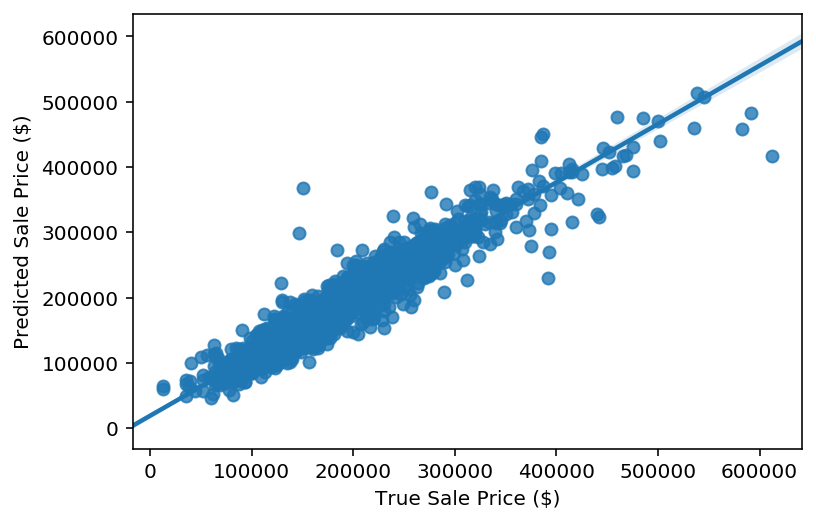

In [20]:
sns.regplot(y_train_ridge, train_preds_ridge)
plt.xlabel('True Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)');

## Model Evaluation

**Check the stats model output for columns with sginificantly low p values**

In [23]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

X = train[f]
y = train['saleprice']
z = test[f]

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
z_poly = poly.fit_transform(z)

X_poly_features = poly.get_feature_names(X.columns)
z_poly_features = poly.get_feature_names(z.columns)

X_poly = pd.DataFrame(X_poly, columns = X_poly_features)
z_poly = pd.DataFrame(z_poly, columns = z_poly_features)
z_poly['id'] = test['id']

In [24]:
summary, summary2, sigs = run_model(X_poly, y, z_poly, 'stats')

In [26]:
summary2.head()

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
1,6.731211e+06,1.154911e+07,0.582834,0.560073,-1.591883e+07,2.938125e+07
overall_qual,-2.761245e+04,1.015010e+05,-0.272041,0.785619,-2.266755e+05,1.714507e+05
exter_qual,3.994716e+05,2.637940e+05,1.514332,0.130105,-1.178795e+05,9.168228e+05
gr_liv_area,-4.618827e+02,4.161371e+02,-1.109929,0.267168,-1.278008e+03,3.542428e+02
kitchen_qual,2.337642e+05,1.800679e+05,1.298200,0.194374,-1.193839e+05,5.869123e+05


### Locate the columns with the lowest p values and put them in a linear regression model

In [27]:
features4_df = summary2.loc[summary2['P>|t|'] < .04, ['P>|t|']].sort_values(by='P>|t|')

In [28]:
features_4 = list(features4_df.index)

In [31]:
features_4

['year_built^2',
 'year_built',
 'gr_liv_area totrms_abvgrd',
 'lot_area^2',
 'totrms_abvgrd^2',
 'gr_liv_area full_bath',
 'total_bsmt_sf bsmt_qual',
 'year_built full_bath',
 'overall_qual total_bsmt_sf',
 'year_remod/add',
 'full_bath',
 'garage_area^2',
 'bsmt_qual year_built',
 'year_remod/add^2',
 'total_bsmt_sf 1st_flr_sf',
 'gr_liv_area year_remod/add',
 'bsmt_qual^2',
 'gr_liv_area kitchen_qual']

**Set up the features matrix and run the model**

In [32]:
X_poly = X_poly[features_4]
y = train['saleprice']
z_poly = z_poly[features_4]
z_poly['id'] = test['id']

In [39]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

X = train[f]
y = train['saleprice']
z = test[f]

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
z_poly = poly.fit_transform(z)

X_poly_features = poly.get_feature_names(X.columns)
z_poly_features = poly.get_feature_names(z.columns)

X_poly = pd.DataFrame(X_poly, columns = X_poly_features)
z_poly = pd.DataFrame(z_poly, columns = z_poly_features)
z_poly['id'] = test['id']

In [40]:
pred_df_sp1, y_pred_sp1, y_train_sp1, kaggle_sp1 = run_model(X_poly, y, z_poly, 'lr')

Cross Val Scores: [0.85014834 0.85783214 0.87601034 0.7825417  0.88076781]
  Cross Val Mean: 0.8494600649169364


In [41]:
pred_df_sp1

,Key Metrics,Train,Test
0,R2,0.90747,0.89885
1,R2_adj,0.89963,0.86789
2,MAE,17021.68160,18063.29111
3,MSE,568284495.45693,675547600.96160
4,RMSE,23838.71841,25991.29856


### Try adding the other missing features from the baseline score to see if it improves

In [122]:
f = ['overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'bsmt_qual',
 'year_built',
 'year_remod/add',
 'full_bath',
 'totrms_abvgrd', 
 'lot_area']

In [88]:
features_5 = []
for i in f:
    if i not in features_4:
        features_5.append(i)

In [129]:
features_5

['overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'bsmt_qual',
 'totrms_abvgrd',
 'lot_area']

**Now merge sets with features 4 and 5 and run the model**

In [131]:
X_5 = pd.merge(train[features_5], X_poly, on=train.index)
X_5.drop(columns='key_0', inplace=True)

y = train['saleprice']

z_5 = pd.merge(test[features_5], z_poly, on=test.index)
z_5.drop(columns='key_0', inplace=True)

In [132]:
z_5['id'] = test['id']

In [133]:
selective_poly_2_df, selective_poly_2_kaggle = run_model(X_5, y, z_5, 'lr')

Cross Val Scores: [0.86289057 0.85783345 0.8760088  0.78254535 0.88077039]
  Cross Val Mean: 0.8520097118068714


In [134]:
selective_poly_2_df

,Key Metrics,Train,Test
0,R2,0.90747,0.89886
1,R2_adj,0.89884,0.86408
2,MAE,17021.67230,18063.23498
3,MSE,568284495.95567,675525382.52625
4,RMSE,23838.71842,25990.87114


### Try running those features through the ridge now to minimize variance

In [139]:
X_6 = pd.merge(train[features_5], X_poly, on=train.index)
X_6.drop(columns='key_0', inplace=True)

y = train['saleprice']

z_6 = pd.merge(test[features_5], z_poly, on=test.index)
z_6.drop(columns='key_0', inplace=True)
z_6['id'] = test['id']

In [140]:
selective_poly_3_df, selective_poly_3_keys, selective_poly_3_kaggle = run_model(X_6, y, z_6, 'ridge')

Cross Val Scores: [0.86471446 0.88729412 0.88564954 0.83790518 0.88529353]
  Cross Val Mean: 0.8721713643493076


In [141]:
selective_poly_3_df

,Key Metrics,Train,Test
0,R2,0.89803,0.90769
1,R2_adj,0.88853,0.87595
2,MAE,17371.65517,17355.07359
3,MSE,626222547.68991,616520750.34730
4,RMSE,25024.43901,24829.83589


In [143]:
selective_poly_3_keys.sort_values(by='coefficient')

,feature,coefficient
96,total_bsmt_sf 1st_flr_sf,-18943.784114
95,total_bsmt_sf^2,-15590.513245
58,gr_liv_area 1st_flr_sf,-11564.539427
63,gr_liv_area totrms_abvgrd,-11114.356706
37,overall_qual full_bath,-9418.497018
...,...,...
38,overall_qual totrms_abvgrd,11443.814205
62,gr_liv_area full_bath,12779.851433
32,overall_qual total_bsmt_sf,12893.707345
97,total_bsmt_sf bsmt_qual,13987.789177


## Submit Predictions

**try submitting the ridge polynomial score**

In [42]:
kaggle_ridge.head()

,Id,SalePrice
0,2658,134873.427568
1,2718,166763.161655
2,2414,197314.421326
3,1989,127926.661061
4,625,173218.015854


In [ ]:
submit_a_kaggle(kaggle_ridge, 5)